<a href="https://colab.research.google.com/github/AndrewStaines/AIML/blob/main/L1_L2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x=np.array([1,2,3,4,5])
y=np.array([2.1,3.8,6.5,9.2,11.3])

In [ ]:
x_b = np.c_[np.ones((x.shape[0],1)),x]
x_b

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [ ]:
alpha_ridge=1.0
alpha_lasso=0.1
num_iterations = 1000
learning_rate=0.01

In [ ]:
#alpha is the penalty
def lasso_reg(x,y,alpha,num_iterations,learning_rate):
  m,n=x.shape
  theta = np.zeros(n)
  for _ in range(num_iterations):
    y_pred=x.dot(theta)
    gradient=(x.T.dot(y_pred-y)+ alpha * np.sign(theta))/m # np.sign for absolute
    theta -= learning_rate * gradient
  return theta

In [ ]:
def ridge_reg(x,y,alpha,num_iterations,learning_rate):
  m,n=x.shape
  theta = np.zeros(n)
  for _ in range(num_iterations):
    y_pred=x.dot(theta)
    gradient=(x.T.dot(y_pred-y)+ alpha * theta)/m
    theta -= learning_rate * gradient
  return theta

In [ ]:
theta_ridge = ridge_reg(x_b,y,alpha_ridge,num_iterations,learning_rate)
theta_lasso = lasso_reg(x_b,y,alpha_lasso,num_iterations,learning_rate)

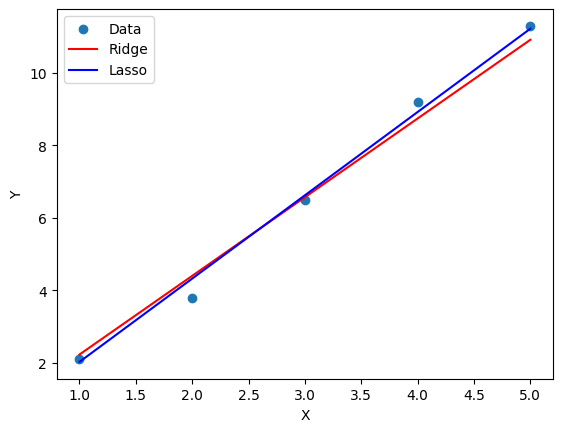

In [ ]:
plt.scatter(x,y,label='Data')
plt.plot(x,x_b.dot(theta_ridge),label=f'Ridge',color='red')
plt.plot(x,x_b.dot(theta_lasso),label=f'Lasso',color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()